In [ ]:
import pandas as pd 
from usefull import PreProcessing
from gann_ml import Gann_ML
from usefull import make_mi_scores,plot_mi_scores,information_cofe
import seaborn as sns
import matplotlib.pyplot as plt 

path = '/home/alireza/Desktop/alireza/jupyter_sttuf/bitcoin.csv'
prep = PreProcessing()
df = pd.read_csv(path)
df = prep.in_processing(df) 
gann = Gann_ML(df)

#ALPHAS
df = prep.gann_high_low1(df)
gann.up_and_down_days(df)
gann.generate_extremes()


#SIGNALS
df = gann.generate_signals()
df['gann_swing_signals'] = gann.gann_swing_signals()
gann.rsi_signals()
gann.extrem_signal_points()


#TOTAL SIGNALS 
df['all_signals'] = df['gann_swing_signals'] + df['RSI_signals'] + df['extrem_signals'] + df['high_low_signal']
df.drop(columns=['gann_swing_signals','RSI_signals','extrem_signals','high_low_signal'],inplace=True)
df = df.drop(columns='Adj Close')

/home/alireza/Desktop/alireza/PYTHON/gann_with_ml/gann_ml.py:47: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'].iloc[i - 1] = -1
/home/alireza/Desktop/alireza/PYTHON/gann_with_ml/gann_ml.py:49: FutureWarning: ChainedAssignme

In [2]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler 
model = XGBRegressor(n_estimators=1000,n_jobs=4 ,random_state=42,verbosity=1)
scaler = MinMaxScaler()
tss = TimeSeriesSplit(n_splits=10)

In [3]:
y = df['all_signals']
X = df.drop(columns='all_signals')


In [4]:
for fold,(train_index,test_index) in enumerate(tss.split(X)):
    print(f'fold:{fold}')
    x_train,x_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    x_train_scaled = scaler.fit_transform(x_train)
    model.fit(x_train_scaled,y_train)
    
    x_test_scaled = scaler.transform(x_test)
    y_test_pred = model.predict(x_test_scaled)

    test_mae = mean_absolute_error(y_true=y_test,y_pred=y_test_pred)

    print(f'test mea:{test_mae},sum of squared errors:{((y_test_pred - y_test)**2).sum()},test acc:{model.score(x_test_scaled,y_test)},train acc:{model.score(x_train_scaled,y_train)}')

   

fold:0
test mea:0.0777991630362565,sum of squared errors:10.01683928545137,test acc:0.9256300687134233,train acc:0.9999995256872032
fold:1
test mea:0.06479717774579409,sum of squared errors:6.653617355236303,test acc:0.9477337614560802,train acc:0.9999990350000695
fold:2
test mea:0.01241416218139867,sum of squared errors:1.728696242920965,test acc:0.9871174875720677,train acc:0.999999432474375
fold:3
test mea:0.020439869169219443,sum of squared errors:2.2170995342228377,test acc:0.9822525765265326,train acc:0.9999987018712313
fold:4
test mea:0.01174795944779999,sum of squared errors:1.1823892222126027,test acc:0.9905765486251071,train acc:0.9999986936417524
fold:5
test mea:0.008590651451342779,sum of squared errors:0.7009068336978038,test acc:0.9944789660286055,train acc:0.9999980908880022
fold:6
test mea:0.0058501338976629505,sum of squared errors:0.580452646436793,test acc:0.9957762269300677,train acc:0.9999983822089147
fold:7
test mea:0.0033971503539705844,sum of squared errors:0.31

In [ ]:
new_df = pd.read_csv('/home/alireza/Desktop/alireza/jupyter_sttuf/new_bitcoin.csv')
new_df = prep.in_processing(new_df) 
gann = Gann_ML(new_df)

#ALPHAS
new_df = prep.gann_high_low1(new_df)
gann.up_and_down_days(new_df)
gann.generate_extremes()


#SIGNALS
new_df = gann.generate_signals()
new_df['gann_swing_signals'] = gann.gann_swing_signals()
gann.rsi_signals()
gann.extrem_signal_points()


#TOTAL SIGNALS 
new_df['all_signals'] = new_df['gann_swing_signals'] + new_df['RSI_signals'] + new_df['extrem_signals'] + new_df['high_low_signal']
new_df.drop(columns=['gann_swing_signals','RSI_signals','extrem_signals','high_low_signal'],inplace=True)

/home/alireza/Desktop/alireza/PYTHON/gann_with_ml/gann_ml.py:49: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'].iloc[i - 1] = 1
/home/alireza/Desktop/alireza/PYTHON/gann_with_ml/gann_ml.py:47: FutureWarning: ChainedAssignmen

In [6]:
y_new = new_df['all_signals']
X_new = new_df.drop(columns='all_signals')

In [ ]:
for fold,(train_index_new,test_index_new) in enumerate(tss.split(X_new)):
    print(f'fold:{fold}')
    x_test_new,y_test_new = X_new.iloc[test_index_new],y_new.iloc[test_index_new]
    
    x_test_scaled_new = scaler.transform(x_test_new)
    y_test_pred_new = model.predict(x_test_scaled_new)

    test_mae_new = mean_absolute_error(y_true=y_test_new,y_pred=y_test_pred_new)

    print(f'fold:{fold},test mea:{test_mae_new},sum of squared errors:{((y_test_pred_new - y_test_new)**2).sum()},test acc:{model.score(x_test_scaled_new,y_test_new)}')


fold:0
fold:0,test mea:0.007749284351510661,sum of squared errors:0.0009732042058614105,acc:0.9996755985980462
fold:1
fold:1,test mea:0.0007818715655178364,sum of squared errors:6.488721012520742e-06,acc:0.9999982530366505
fold:2
fold:2,test mea:0.0004861993272373054,sum of squared errors:3.351605330204042e-06,acc:0.9999980448968907
fold:3
fold:3,test mea:0.0006649897477473132,sum of squared errors:4.8437219146935315e-06,acc:0.999998616079453
fold:4
fold:4,test mea:0.0007264874667660999,sum of squared errors:4.47568130103283e-06,acc:0.9999968670230893
fold:5
fold:5,test mea:0.00045462768632985117,sum of squared errors:2.1383822317269908e-06,acc:0.9999984243499345
fold:6
fold:6,test mea:0.0007698187504761986,sum of squared errors:5.451577531764246e-06,acc:0.9999980919478639
fold:7
fold:7,test mea:0.0002419991745097962,sum of squared errors:5.182637652728792e-07,acc:0.9999992744307287
fold:8
fold:8,test mea:0.0004965649069552976,sum of squared errors:2.1536088289719596e-06,acc:0.99999902

In [19]:
y_test_pred_new

array([-5.0040495e-01, -9.9834991e-01,  4.9953505e-01,  9.9919373e-01,
       -5.0072855e-01, -1.1949734e-04, -5.0040495e-01], dtype=float32)

In [8]:
X['Volume'] = X['Volume'].astype('float')

X_new['Volume'] = X_new['Volume'].astype('float')

In [9]:
import shap
X100 = shap.utils.sample(X_new, 100)
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_new)

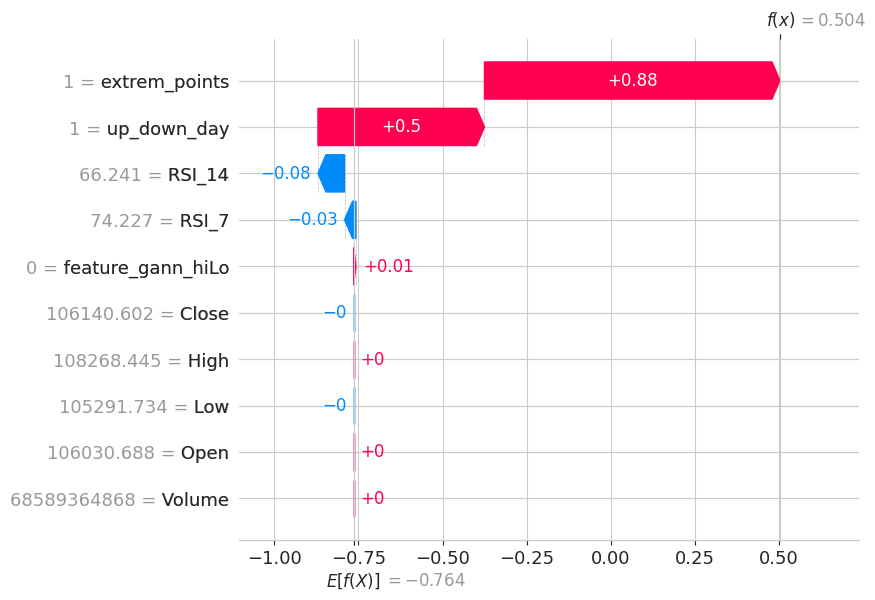

In [18]:
shap.plots.waterfall(shap_values[16])

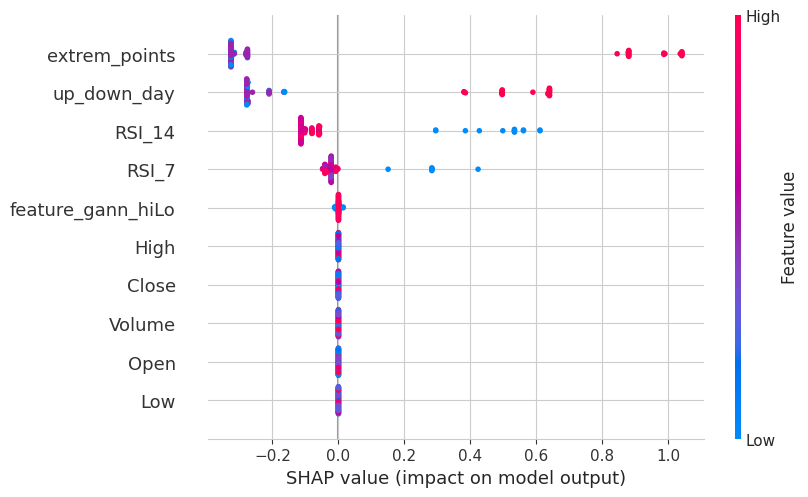

In [11]:
shap.plots.beeswarm(shap_values)

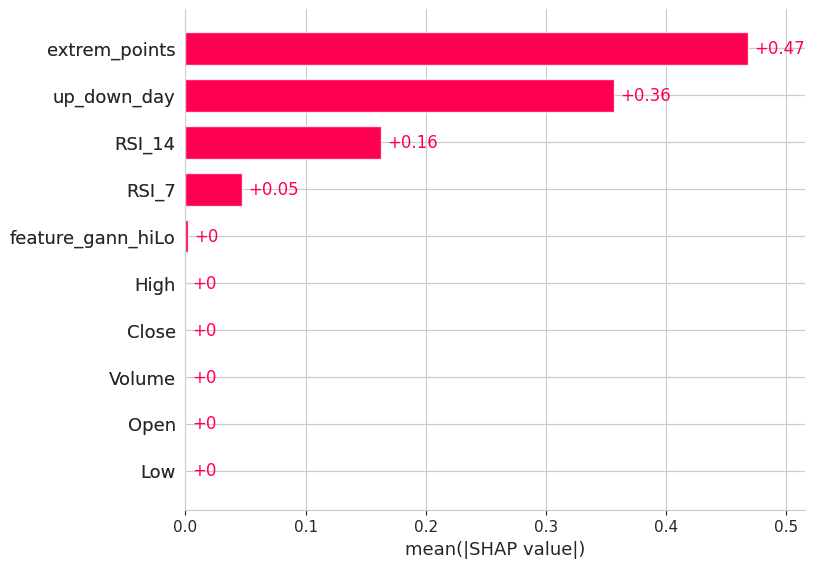

In [12]:
shap.plots.bar(shap_values)

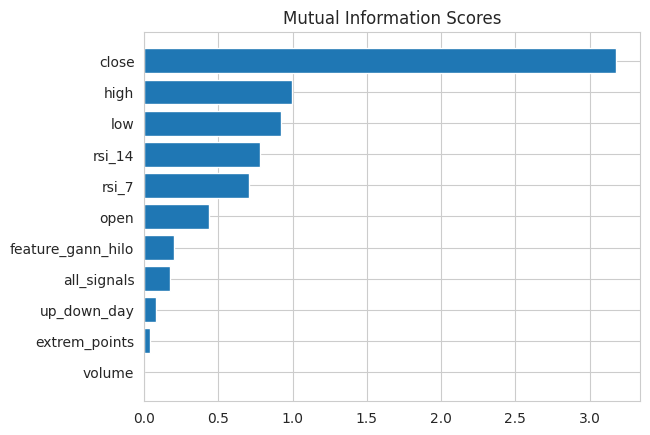

In [13]:


prep.add_return(new_df)
new_df.columns = new_df.columns.str.lower()

mi = make_mi_scores(new_df)

plot_mi_scores(mi)

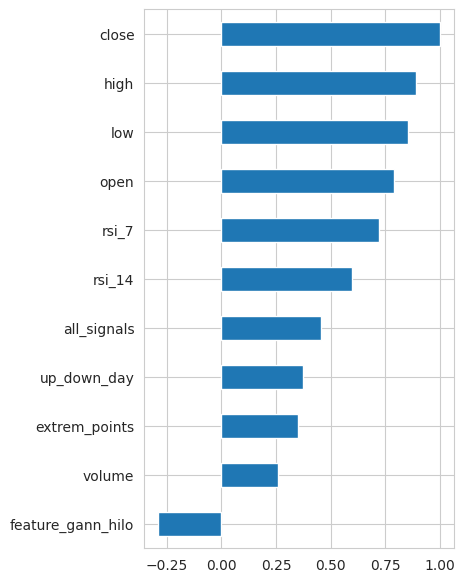

In [14]:
information_cofe(new_df)

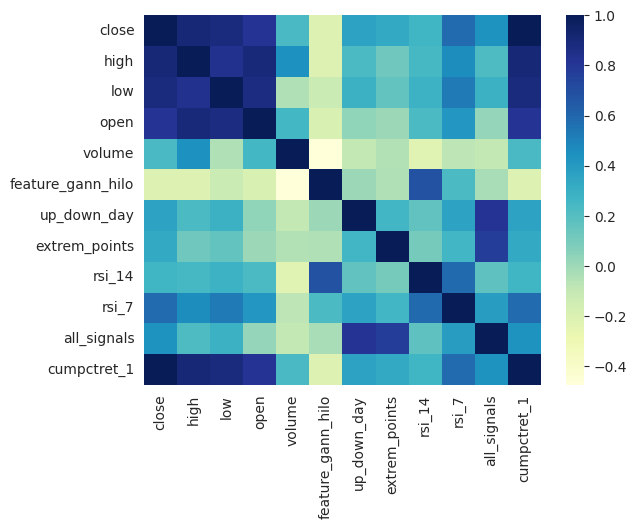

In [15]:
new_df_corr = new_df.corr()

sns.heatmap(new_df_corr,cmap="YlGnBu")

plt.show()